# Exercise 4: Geodemographic Analysis of Los Angeles

### Julian Ornelas

1. Using the DataStore for geosnap at /srv/data/geonsap extract census tract data for Los Angeles using the ACS 2021 dataset.

In [1]:
import os

os.environ['PROJ_LIB'] = '/opt/tljh/user/share/proj'

from geosnap import DataStore
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn
import pysal
import warnings
import mapclassify
import geopandas as gpd
from geosnap.io import get_acs
warnings.simplefilter('ignore')

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [2]:
datasets = DataStore('/srv/data/geosnap')

In [3]:
la_df = get_acs(datasets, years=[2021], county_fips="06037", level='tract')

In [4]:
la_df.head()

,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,year
0,06037101110,810.0,25.0,5.0,0.0,50.0,16.0,52.0,13.0,1443.0,...,11.455596,3.047819,0.446663,8.565423,0.052549,3.862323,0.0,0.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",2021
1,06037101122,234.0,12.0,1.0,14.0,75.0,40.0,58.0,0.0,1747.0,...,6.166983,0.355787,0.901328,4.269450,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",2021
2,06037101220,1231.0,22.0,38.0,8.0,57.0,14.0,43.0,0.0,1535.0,...,18.141222,1.702484,2.009489,9.852079,0.000000,12.391850,0.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",2021
3,06037101221,591.0,0.0,0.0,18.0,16.0,15.0,0.0,0.0,2043.0,...,19.940315,1.573521,1.085187,16.386327,0.325556,6.456864,0.0,0.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",2021
4,06037101222,536.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1488.0,...,38.475836,6.617100,7.620818,38.475836,0.000000,12.007435,0.0,0.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2021


In [5]:
la_df.shape

(2498, 158)

2. Define a list called cluster_variables containing the following variables:
“median_household_income”,
“median_home_value”,
“p_edu_college_greater”,
“p_edu_hs_less”,
“p_nonhisp_white_persons”,
“p_nonhisp_black_persons”,
“p_hispanic_persons”,
“p_asian_persons”,

In [6]:
cluster_variables = [
    'median_household_income',
    'median_home_value',
    'p_edu_college_greater',
    'p_edu_hs_less',
    'p_nonhisp_white_persons',
    'p_nonhisp_black_persons',
    'p_hispanic_persons',
    'p_asian_persons'
]

3. Create a new GeoDataFrame that subsets the cluster_variables.

In [7]:
la_geodf = la_df[cluster_variables + ['geometry']]

In [8]:
la_geodf.shape

(2498, 9)

In [9]:
type(la_geodf)

geopandas.geodataframe.GeoDataFrame

In [10]:
la_geodf.head()

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931..."


4. Add the variable n_total_pop to the new GeoDataFrame.

In [11]:
la_geodf['n_total_pop'] = la_df.n_total_pop

In [12]:
la_geodf.head()

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0


5. Fill any NAN values with 0

In [13]:
la_geodf

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0
...,...,...,...,...,...,...,...,...,...,...
2493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-118.39099 34.00167, -118.3909...",0.0
2494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-118.36215 34.13903, -118.3612...",0.0
2495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505...",0.0
2496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",0.0


In [14]:
la_geodf.fillna(0, inplace=True)

In [15]:
la_geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   median_household_income  2498 non-null   float64 
 1   median_home_value        2498 non-null   float64 
 2   p_edu_college_greater    2498 non-null   float64 
 3   p_edu_hs_less            2498 non-null   float64 
 4   p_nonhisp_white_persons  2498 non-null   float64 
 5   p_nonhisp_black_persons  2498 non-null   float64 
 6   p_hispanic_persons       2498 non-null   float64 
 7   p_asian_persons          2498 non-null   float64 
 8   geometry                 2498 non-null   geometry
 9   n_total_pop              2498 non-null   float64 
dtypes: float64(9), geometry(1)
memory usage: 195.3 KB


In [16]:
la_geodf

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0
...,...,...,...,...,...,...,...,...,...,...
2493,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-118.39099 34.00167, -118.3909...",0.0
2494,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-118.36215 34.13903, -118.3612...",0.0
2495,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505...",0.0
2496,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",0.0


6. Plot a map of the geometries

<Axes: >

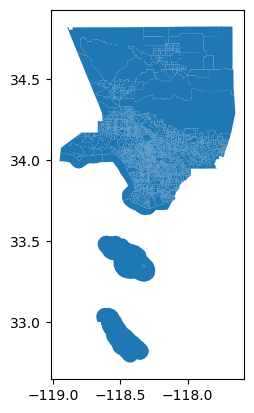

In [17]:
la_geodf.plot()

7. Create a Queen contiguity spatial weights object for this dataframe

In [18]:
from libpysal.weights import Queen

In [19]:
wq = Queen.from_dataframe(la_geodf)

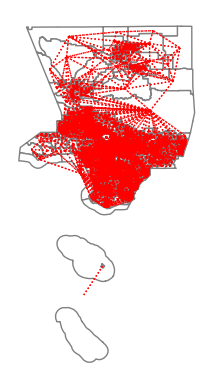

In [20]:
ax = la_geodf.plot(edgecolor='grey', facecolor='w')
f,ax = wq.plot(la_geodf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [21]:
wq.component_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [22]:
la_geodf['components'] = wq.component_labels
la_geodf.head()

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop,components
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0,0
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0,0
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0,0
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0,0
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0,0


In [23]:
la_geodf.components.value_counts()

components
0    2496
1       2
Name: count, dtype: int64

<Axes: >

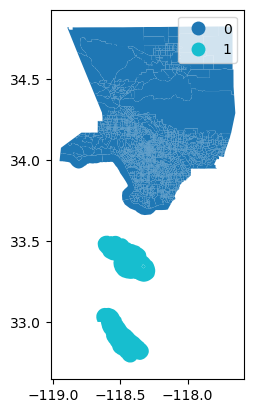

In [24]:
la_geodf.plot(column='components', categorical=True, legend=True)

8. Create a new geodataframe by dropping the Channel Island tracts.

In [25]:
la_queen = la_geodf[la_geodf['components'] == 0]

<Axes: >

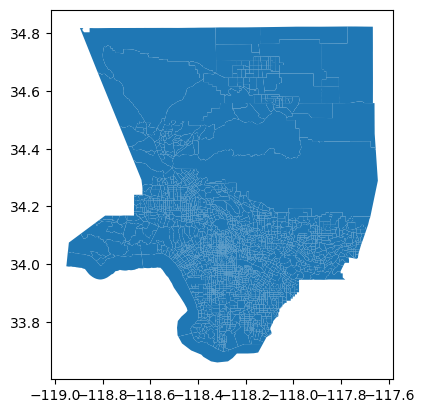

In [26]:
la_queen.plot()

9. Recreate the Queen weights for the new geodataframe


In [27]:
wq2 = Queen.from_dataframe(la_queen)

10. Using small multiples, create choropleth maps using quintiles for each of the variables.

In [28]:
cluster_variables = [
    'median_household_income',
    'median_home_value',
    'p_edu_college_greater',
    'p_edu_hs_less',
    'p_nonhisp_white_persons',
    'p_nonhisp_black_persons',
    'p_hispanic_persons',
    'p_asian_persons'
]

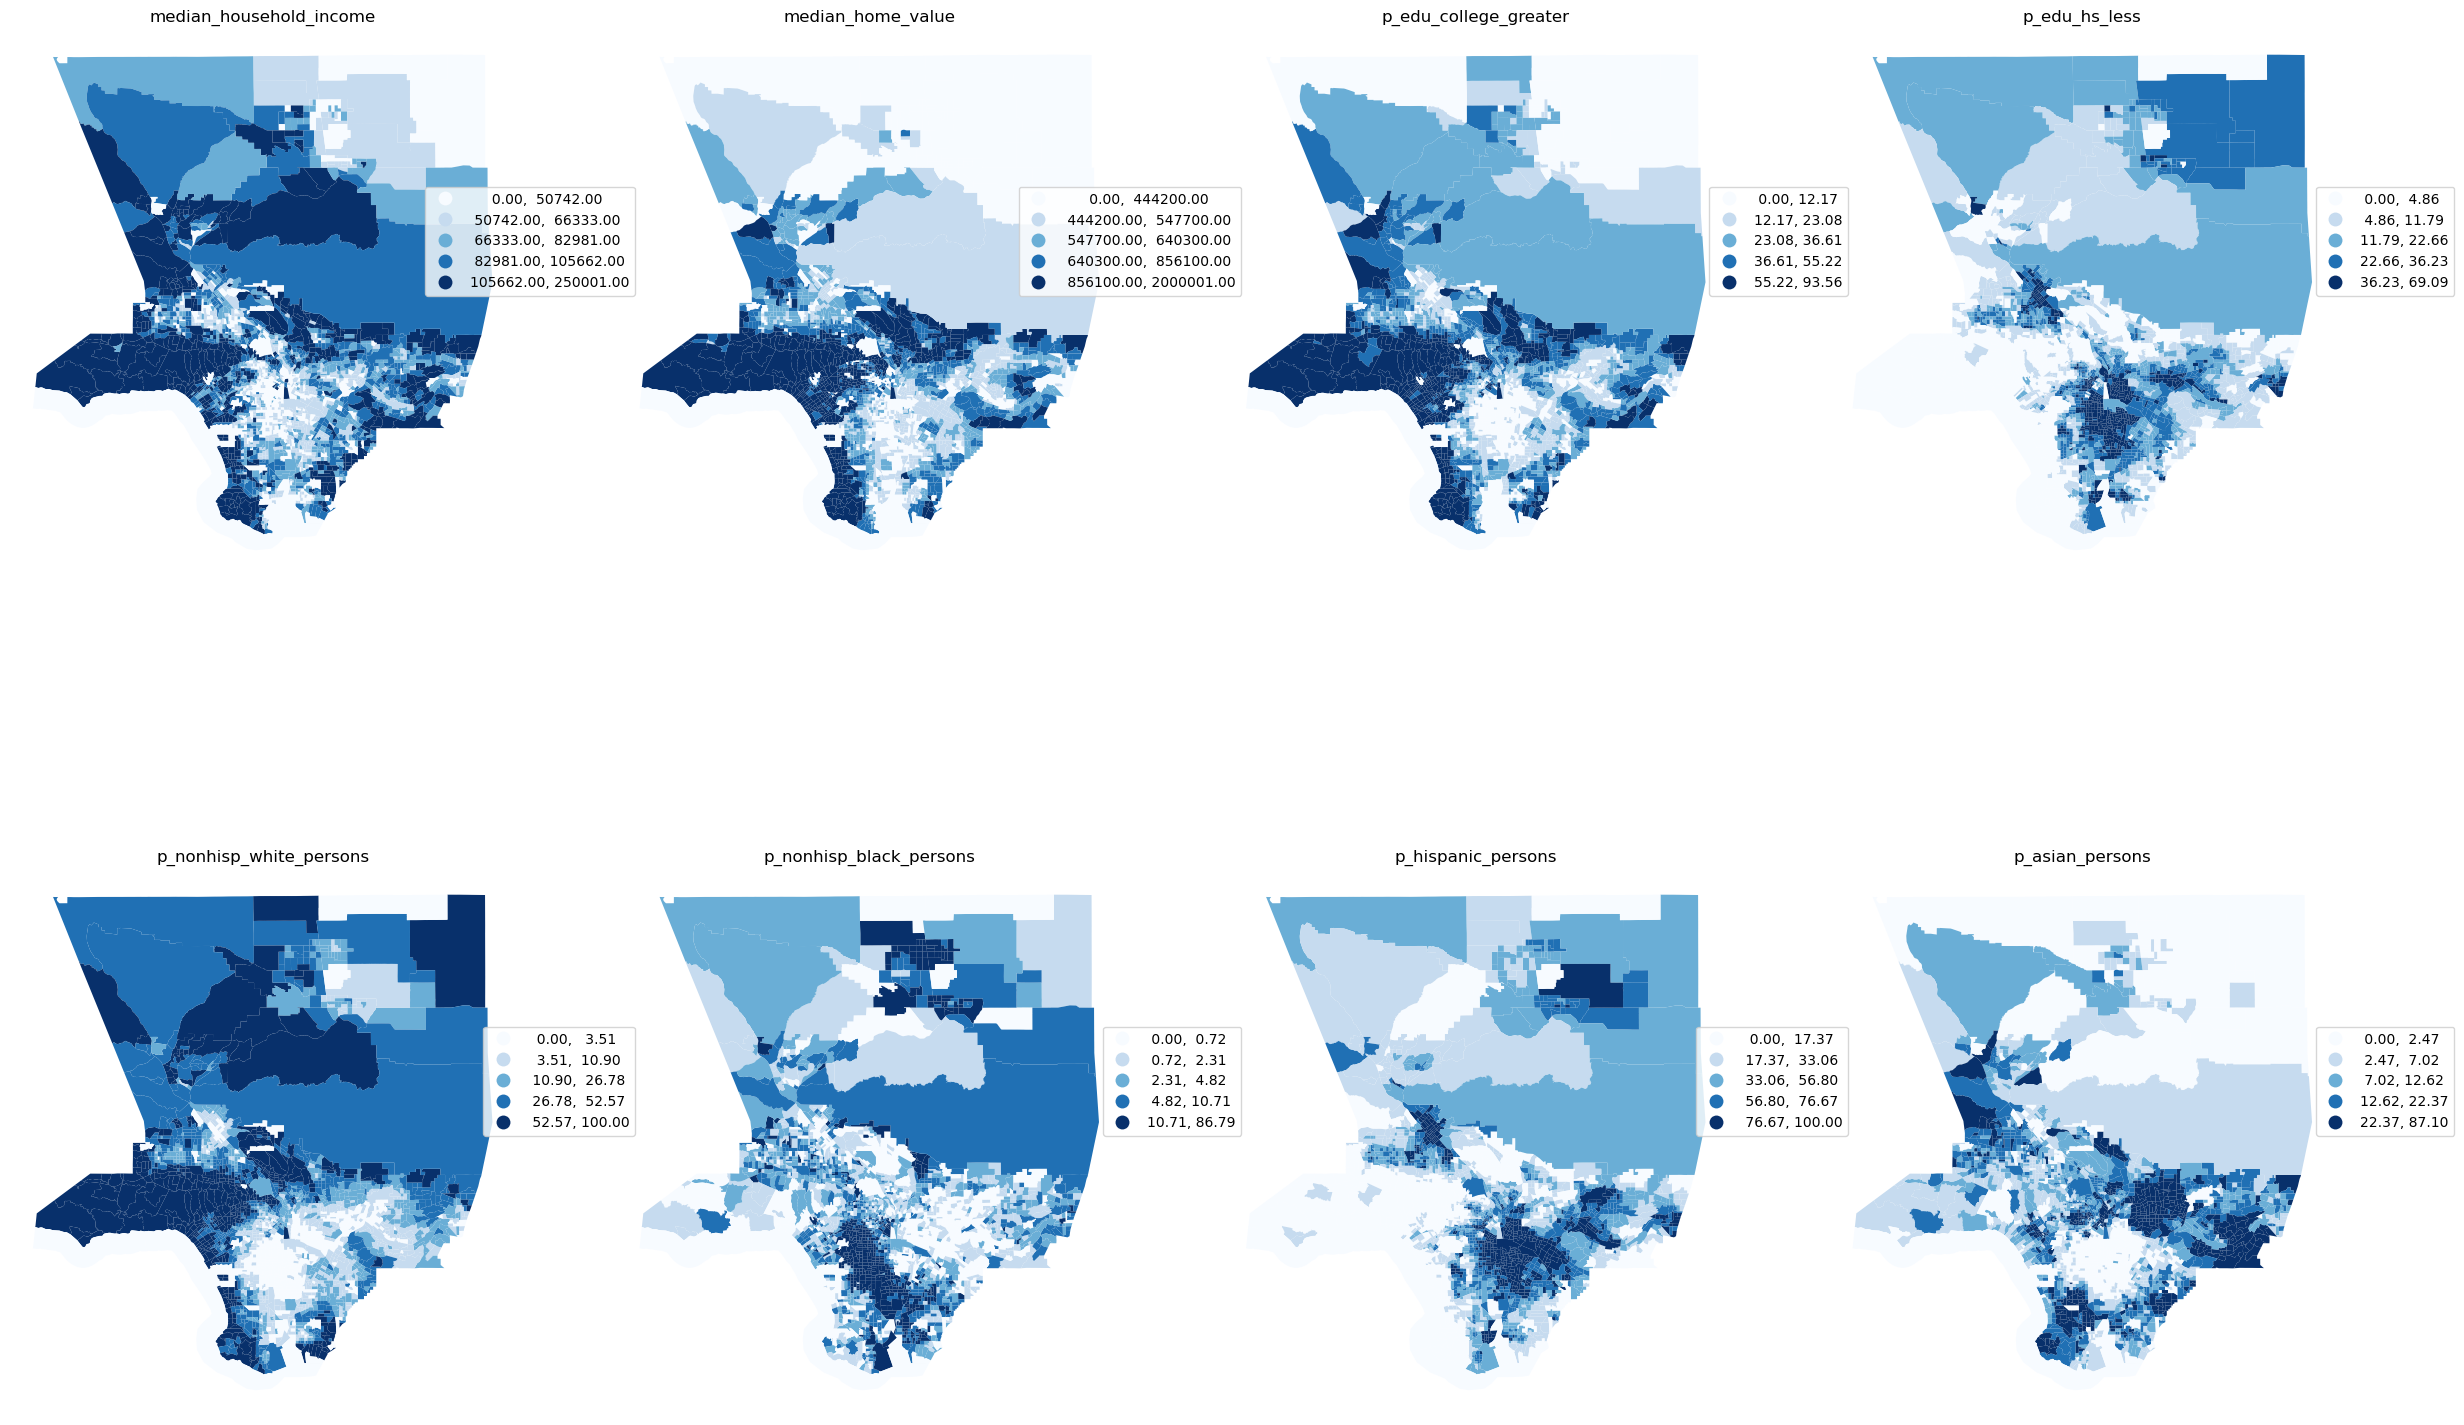

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 20)) #30,20 "bbox_to_anchor": (1.25, 0.5)

axs = axs.flatten()

for i, col in enumerate(cluster_variables):
    ax = axs[i]
    la_queen.plot(column=col, ax=ax, scheme='Quantiles', cmap='Blues', legend=True, 
                  legend_kwds={"fmt": "{:.2f}", "loc": "lower right", "bbox_to_anchor": (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)
#ax = axs[i+1]
#ax.set_axis_off()
plt.show()

11. Create a pairplot using seaborn for the cluster variables.


In [30]:
import seaborn

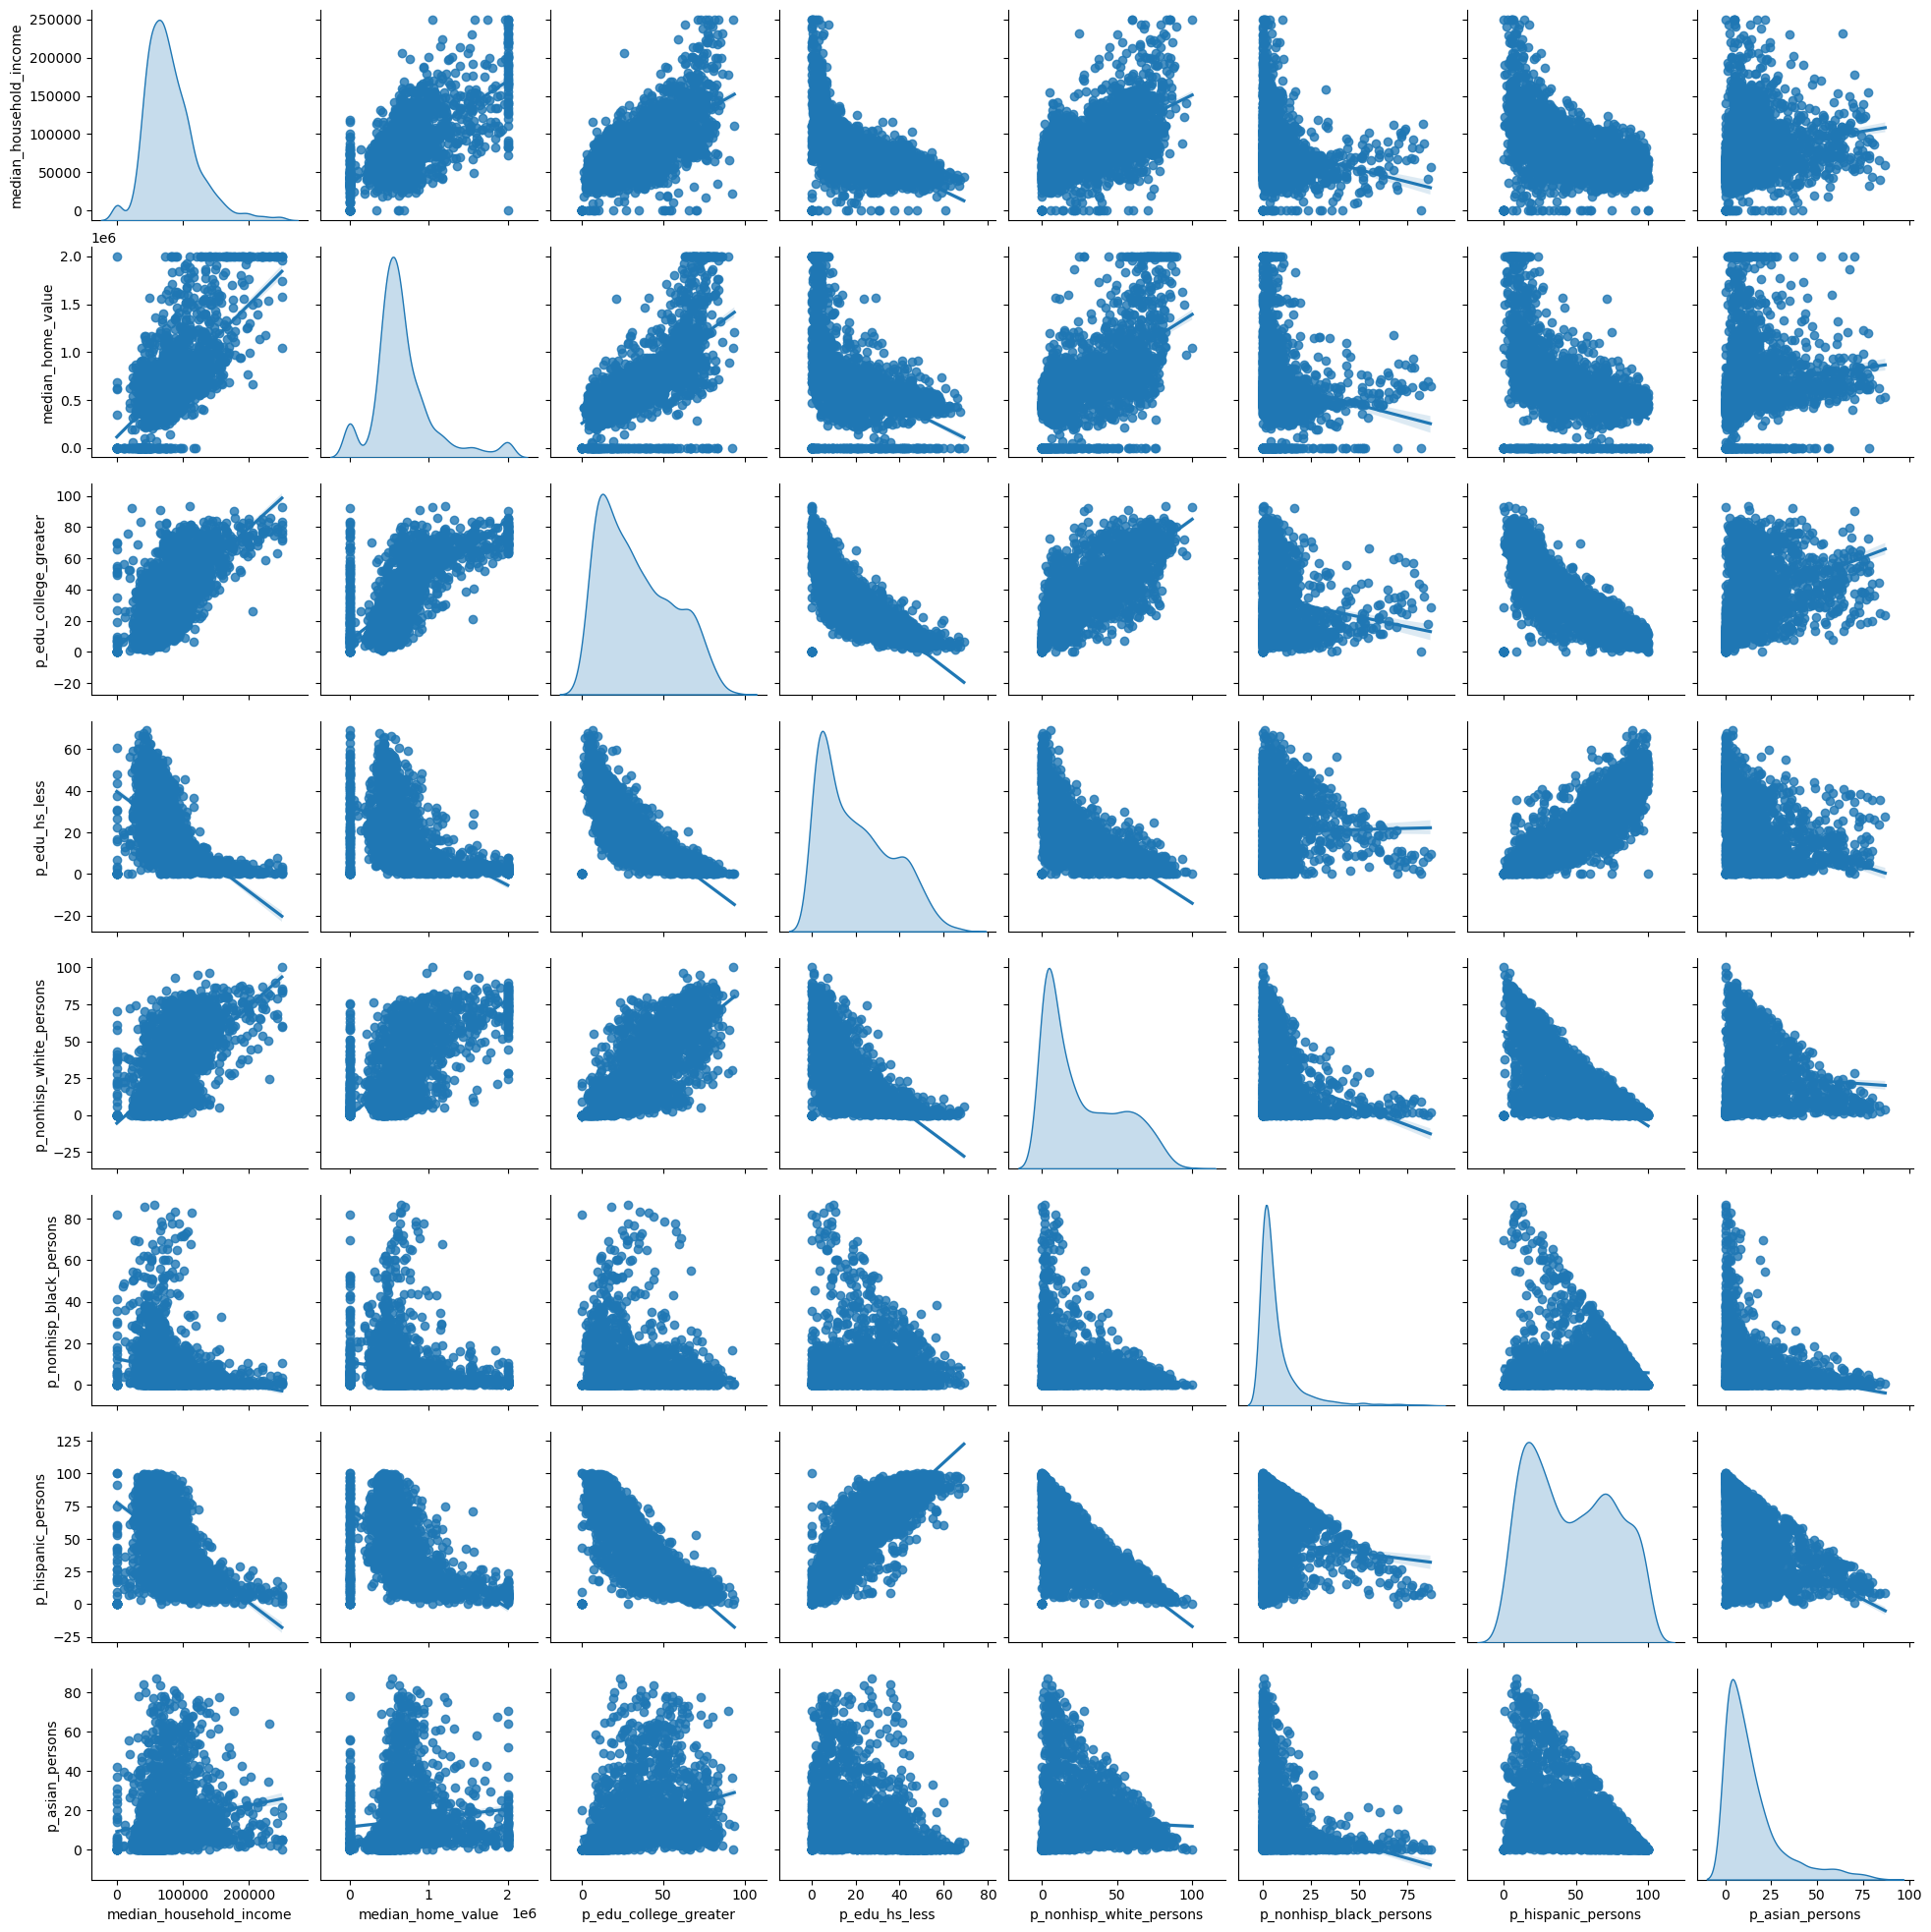

In [31]:
_ = seaborn.pairplot(
    la_queen[cluster_variables], kind="reg", diag_kind="kde"
)

12. Determine the number of neighborhoods that would be required if each neighborhood had an average of 8000 total population. Let this be the integer valued variable n_hoods


In [32]:
la_queen.head()

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop,components
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0,0
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0,0
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0,0
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0,0
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0,0


In [33]:
la_queen.n_total_pop.sum()

10015472.0

In [34]:
n_hoods = int(la_queen.n_total_pop.sum() / 8000)
n_hoods

1251

13. Using KMeans, define neighborhoods with k=n_hoods.

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import robust_scale

In [36]:
la_scaled = robust_scale(la_queen[cluster_variables])

In [37]:
kmeans = KMeans(n_clusters=n_hoods)

import numpy as np
np.random.seed(123)
kcls = kmeans.fit(la_scaled)

In [38]:
kcls.labels_[:20]

array([ 537, 1042,  989, 1132,  344,   52,  537,  374,  170,  272,  758,
        118, 1168, 1168,  802, 1178,  601, 1109, 1241,  531], dtype=int32)

In [39]:
la_queen['kmeans'] = kcls.labels_
la_queen.head()

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop,components,kmeans
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0,0,537
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0,0,1042
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0,0,989
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0,0,1132
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0,0,344


14. Using Agglomerative Clustering, define neighborhoods with the number of clusters equal to n_hoods


In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
np.random.seed(123)
agglom_model = AgglomerativeClustering(linkage="ward", n_clusters=n_hoods)
agglom_model.fit(la_scaled)
la_queen["agglom"] = agglom_model.labels_
la_queen.head(10)

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop,components,kmeans,agglom
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0,0,537,115
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0,0,1042,845
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0,0,989,59
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0,0,1132,1228
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0,0,344,455
5,111393.0,680700.0,36.313702,7.445835,75.098328,1.376598,14.749263,3.982301,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",4068.0,0,52,217
6,68000.0,589200.0,28.004957,9.045849,65.243179,0.118624,21.708185,7.710558,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221...",3372.0,0,537,115
7,65481.0,775200.0,31.372549,4.738562,77.815507,1.584607,9.281268,8.375778,"MULTIPOLYGON (((-118.36533 34.22870, -118.3639...",1767.0,0,374,237
8,91402.0,618200.0,38.612799,8.473364,65.850612,1.898576,15.138646,10.092431,"MULTIPOLYGON (((-118.35620 34.21971, -118.3559...",4003.0,0,170,600
9,84519.0,553400.0,26.650564,18.921095,23.894863,0.358423,63.799283,6.869773,"MULTIPOLYGON (((-118.35307 34.20878, -118.3530...",1674.0,0,272,178


15. Add a contiguity constraint to Agglomerative clustering and generate new neighborhood definitions.

In [42]:
agglom_contig_model = AgglomerativeClustering(
    linkage="ward", connectivity=wq2.sparse, n_clusters=n_hoods
)
agglom_contig_model.fit(la_scaled)

AgglomerativeClustering(connectivity=<2496x2496 sparse matrix of type '<class 'numpy.float64'>'
	with 16170 stored elements in Compressed Sparse Row format>,
                        n_clusters=1251)

In [43]:
la_queen["agglom_contig"] = agglom_contig_model.labels_
la_queen.head(10)

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop,components,kmeans,agglom,agglom_contig
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0,0,537,115,859
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0,0,1042,845,1181
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0,0,989,59,0
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0,0,1132,1228,834
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0,0,344,455,834
5,111393.0,680700.0,36.313702,7.445835,75.098328,1.376598,14.749263,3.982301,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",4068.0,0,52,217,1181
6,68000.0,589200.0,28.004957,9.045849,65.243179,0.118624,21.708185,7.710558,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221...",3372.0,0,537,115,859
7,65481.0,775200.0,31.372549,4.738562,77.815507,1.584607,9.281268,8.375778,"MULTIPOLYGON (((-118.36533 34.22870, -118.3639...",1767.0,0,374,237,1100
8,91402.0,618200.0,38.612799,8.473364,65.850612,1.898576,15.138646,10.092431,"MULTIPOLYGON (((-118.35620 34.21971, -118.3559...",4003.0,0,170,600,1100
9,84519.0,553400.0,26.650564,18.921095,23.894863,0.358423,63.799283,6.869773,"MULTIPOLYGON (((-118.35307 34.20878, -118.3530...",1674.0,0,272,178,1


16. Using MaxP, define neighborhoods using the cluster_variables with a threshold of 8000 for the n_total_pop variable.


In [44]:
from spopt.region import MaxPHeuristic as MaxP

In [45]:
maxp_model = MaxP(la_queen, wq2, cluster_variables, 'n_total_pop', 8000)

In [46]:
np.random.seed(123)
maxp_model.solve()

In [47]:
maxp_model.labels_[:20]

[571,
 217,
 120,
 120,
 120,
 217,
 571,
 253,
 253,
 444,
 588,
 217,
 571,
 588,
 217,
 202,
 571,
 571,
 121,
 184]

In [48]:
la_queen['maxp'] = maxp_model.labels_
la_queen.head()

,median_household_income,median_home_value,p_edu_college_greater,p_edu_hs_less,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry,n_total_pop,components,kmeans,agglom,agglom_contig,maxp
0,68529.0,549500.0,27.323117,9.455494,59.422532,0.283578,25.908739,10.440835,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",3879.0,0,537,115,859,571
1,108198.0,707200.0,38.239034,16.052130,69.225336,2.331057,7.982105,14.292442,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4247.0,0,1042,845,1181,217
2,59119.0,582300.0,25.567322,24.924357,36.505721,0.223277,49.762769,9.517164,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3583.0,0,989,59,0,120
3,48305.0,482300.0,24.904943,23.536122,55.600322,2.605426,32.312651,5.613752,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3723.0,0,1132,1228,834,120
4,32106.0,421600.0,18.501760,17.647059,58.364312,0.631970,34.014870,6.988848,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",2690.0,0,344,455,834,120


<Axes: >

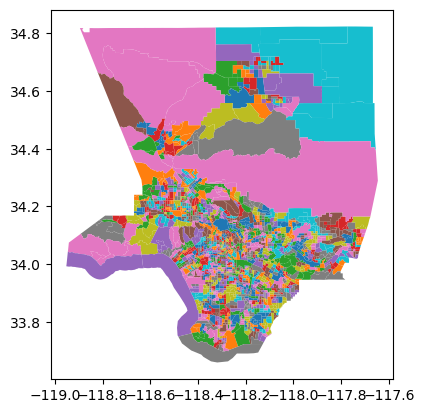

In [49]:
la_queen.plot(column='maxp', categorical=True)

17. Compare all four cluster solutions by using small multiples to plot four categorical maps of the clusters.

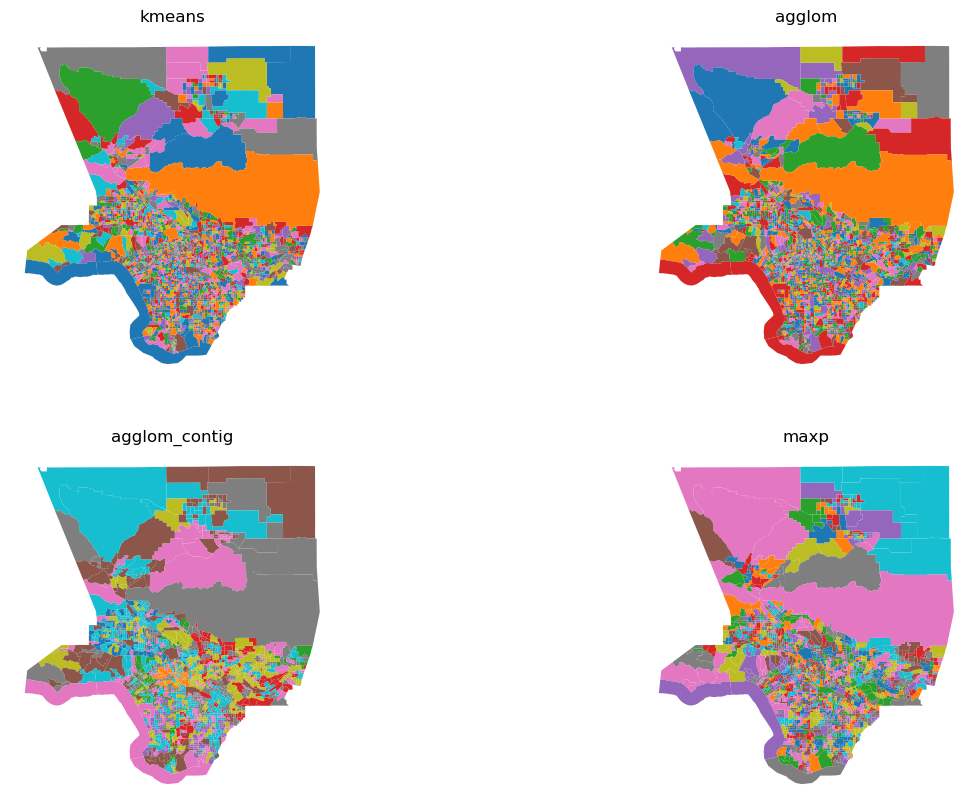

In [50]:
cluster_types = ['kmeans', 'agglom', 'agglom_contig', 'maxp']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axs = axs.flatten()

for i, col in enumerate(cluster_types):
    ax = axs[i]
    la_queen.plot(column=col, ax=ax, categorical=True)
    ax.set_axis_off()
    ax.set_title(col)
plt.show()

18. Compare all four cluster solutions using the Rand Index. Comment on which solutions are most similar. Why might this be?


In [51]:
from sklearn.metrics import rand_score

In [52]:
cluster_types = ['kmeans', 'agglom', 'agglom_contig', 'maxp']

for i in range(len(cluster_types)):
    for j in range(i+1, len(cluster_types)):
        print(f"Rand score for {cluster_types[i]} and {cluster_types[j]}: \
            {rand_score(la_queen[cluster_types[i]], la_queen[cluster_types[j]])}")

Rand score for kmeans and agglom:             0.9992918529366425
Rand score for kmeans and agglom_contig:             0.998032924824007
Rand score for kmeans and maxp:             0.998286316222188
Rand score for agglom and agglom_contig:             0.9981835465803401
Rand score for agglom and maxp:             0.9984587765274138
Rand score for agglom_contig and maxp:             0.9982301140743024


Based on the rand scores above, the kmeans and agglomerative clustering methods had the highest score, so they would be the most similar.  This might be because those clustering methods are very similar in how they cluster things together (in this case, census tracts).  KMeans starts with random seeds for the cluster centers based on how many clusters you want, then iteratively regroups until the clusters do not change.  Agglomerative clustering starts with all the objects as their own individual clusters, then creates a new cluster based on the two objects closest to each other, and repeats until it reaches the number of clusters you want.  Based on how many census tracts there are in Los Angeles County and how many clusters ("neighborhoods") we wanted to create, it is reasonable to expect that these two methods might produce very similar cluster groupings.

19. Compare all four cluster solutions based on silhouette scores. Comment on the rankings of the four methods in terms of these scores. Provide an explanation for your findings.


In [53]:
from sklearn.metrics import silhouette_score

In [54]:
for i in range(len(cluster_types)):
    print(f"Silhouette score for {cluster_types[i]}: {silhouette_score(la_scaled, la_queen[cluster_types[i]])}")

Silhouette score for kmeans: 0.14003530842105796
Silhouette score for agglom: 0.1761771916155347
Silhouette score for agglom_contig: -0.13994561808348865
Silhouette score for maxp: -0.39513411916922836


Based on the silhouette scores, maxp has the lowest, which indicates that some or many of the census tracts in LA County were been assigned to wrong clusters by the method and should be assigned to others that are more similar to the tract's characteristics.  KMeans and agglomerative are both near 0, which means that some of the clusters produced by each method overlap to some degree.  A likely explanation for this is that the centroids for some of the census tracts may have been the same distance from two or more cluster centers, so they were assigned to multiple clusters simultaneously.